# t-SNE

**t-SNE（t-Distributed Stochastic Neighbor Embedding）**是一种广泛使用的非线性降维方法，特别适用于高维数据的可视化。它通过保留局部结构并尽量减少不同数据点之间的相对距离，从而将数据嵌入到低维空间（通常是2维或3维），使得相似的数据点在低维空间中也尽量接近，便于直观理解高维数据的分布模式。

## t-SNE的原理

t-SNE的核心思想是保留数据的局部邻域结构，即尽量保证相似的数据点在低维空间中也尽量靠近，同时尽量拉开不相似的点。它通过以下几个步骤工作：

**1. 计算相似度（高维空间）**
- 对于数据集中的每一对数据点$x_i$和$x_j$，t-SNE首先计算它们在高维空间中的相似度。这个相似度由高斯分布来衡量

**2. 计算低维空间中的相似度（低维空间）**
- 通过设置随机的低维初始化点，计算每一对点在低维空间中的相似度。这个相似度由学生t分布来衡量，它与高维空间中的高斯分布类似，但更注重稀疏区域的扩展，使得不同类的点在低维空间中距离拉得更远。

**3. 优化目标（最小化KL散度）**
- 通过最小化高维空间相似度分布与低维空间相似度分布之间的Kullback-Leibler（KL）散度，来不断调整低维空间中的点的位置。KL散度度量的是两个分布之间的差异，t-SNE试图通过迭代更新，找到一个低维表示，使得高维和低维空间的相似度**尽可能相似**。

## t-SNE的核心思想

- **相似性建模**：t-SNE 通过计算高维空间中点与点之间的相似性（通常用高斯分布的概率来衡量），并尝试在低维空间中保留这些相似性。
- **优化目标**：通过最小化高维空间和低维空间之间的 Kullback-Leibler 散度（KL散度），使高维空间中邻近的点在低维空间中保持接近。
- **局部结构保留**：t-SNE 更注重数据点之间的局部关系，而不是全局结构。

## t-SNE优缺点

### t-SNE优点

- **可视化高维数据**：t-SNE特别适用于高维数据的可视化。
- **局部结构保持良好**：t-SNE保留了局部邻域的结构，使得在降维后，相似的数据点在低维空间中通常会聚集在一起。这对于聚类、异常检测等任务非常有用。
- **适应非线性结构**：与PCA等线性降维方法不同，t-SNE能够揭示数据的非线性结构，适合处理复杂的数据。

### t-SNE缺点

- **计算开销大**：t-SNE是一个计算密集型的算法，涉及到每一对点的相似度计算，数据点的数量和维度都会影响计算效率。因此在处理非常大的数据集时，t-SNE算法计算量会急剧增加。
- **不可逆降维**：t-SNE是一个非线性降维方法，主要是为了可视化而设计，并不是为了数据压缩或数据恢复，无法像PCA那样直接恢复高维数据。
- **无法保持全局结构**：虽然t-SNE在局部结构方面表现良好，但对于数据集的全局结构（如大类之间的关系）可能保留得不够好。

## t-SNE适用场景

- **数据可视化**：用于将高维数据（如图像、文本、基因表达数据等）降到2维或3维，便于可视化分析。
- **聚类分析**：在降维后的低维空间中，我们可以直观地观察数据的聚类结构，有助于发现数据中的潜在模式。
- **异常检测**：通过观察降维后的数据点分布，识别那些在低维空间中位于离群区域的数据点。

## TSNE
- `n_components`: 指定降维后的目标维度。
- `perplexity`: 
    - 控制每个数据点的邻域大小，影响数据点在降维过程中相互之间的相似度计算。
    - 较小的 perplexity 值会使得每个数据点的邻域较小，强调局部结构，而较大的 perplexity 值会让邻域变大，考虑到更多的数据点
    - 默认值为30，通常设置在 5 到 50 之间。较小的 perplexity 值适用于较小的数据集，较大的值适用于大数据集。
- `random_state`: 随机数种子。
- `n_jobs`: 并行计算的核心数。默认情况下为 None，表示不使用并行。如果使用 -1，表示使用所有核心。

## t-SNE案例

### digits数据集介绍

digits数据集是一个经典的手写数字图像识别数据集，任务是根据图像的特征预测图像所代表的数字标签
- 这个数据集总共有1797个图像样本：
    - 每个图像是一个 8x8 的灰度图像，其每个像素的灰度值范围为 0 到 16，表示黑色（0）到白色（16）。这些图像已经被展平为 64 维的向量，因此每个图像可以表示为一个长度为 64 的向量
    - 数字标签的范围是从 0 到 9，对应的是手写数字
- 这个数据集由以下组成
    - data：一个数组，形状为 (1797, 64)，每一行表示一个 8x8 图像的特征（64个像素值，表示灰度强度）。
    - target：一个数组，形状为 (1797,)，每个元素表示相应图像的标签（0到9之间的数字）。
    - target_names：一个数组，表示数字标签的类别名，通常是 [0, 1, 2, ..., 9]。
    - images：一个数组，形状为 (1797, 8, 8)，每个元素是一个 8x8 的数字图像矩阵。
    - DESCR：一个字符串，包含数据集的描述信息。

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import pandas as pd

# 加载 digits 数据集
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

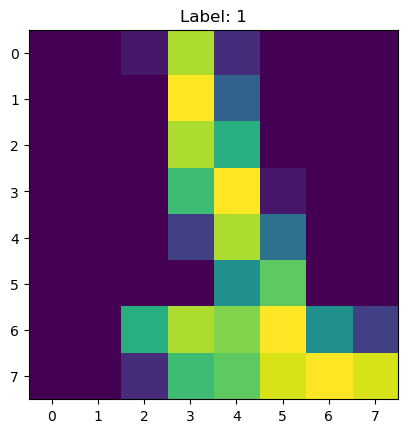

In [2]:
# 绘制数字图像
idx=1000
plt.imshow(digits.images[idx])
plt.title(f'Label: {digits.target[idx]}')
plt.show()

### t-SNE绘制

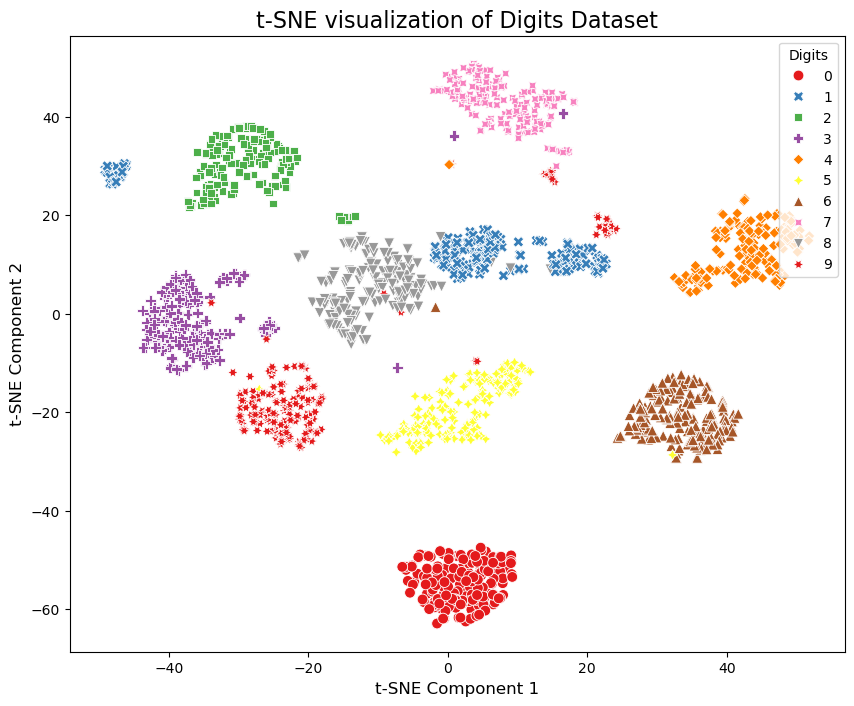

In [3]:
X = digits.data  # 图像的特征数据（64维向量）
y = digits.target  # 图像的标签（数字0-9）
X = digits.data  # 图像的特征数据（64维向量）
y = digits.target  # 图像的标签（数字0-9）

# 使用 t-SNE 将数据降维到2维
tsne = TSNE(n_components=2, random_state=42) # 初始化 t-SNE 降维器，将数据降到 2 维，并设置随机种子以确保结果的可复现性
X_tsne = tsne.fit_transform(X) # 将原始数据 X 输入到 tsne 中，进行降维处理，并得到降维后的结果 X_tsne

# 将降维后的数据和标签组合成一个 DataFrame，方便后续绘图
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE Component 1', 'TSNE Component 2'])
df_tsne['Label'] = y

# 使用 seaborn 绘制散点图
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_tsne, x='TSNE Component 1', y='TSNE Component 2', hue='Label', palette='Set1', style='Label', s=60)

# 设置图形标题和标签
plt.title('t-SNE visualization of Digits Dataset', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)

# 显示图例
plt.legend(title='Digits', loc='upper right', fontsize=10)

# 显示图形
plt.show()